# Defining the Question

### a) Specifying the Question

Predict the customers that are most likely to default on their loan payments.

### b) Defining the Metric for Success

This project will be considered successful if we are able to create a prediction model with an accuracy scorer of 80% or higher and use it to make predictions.

### c) Understanding the context 

An organization wants to predict possible defaulters for the consumer loans product. They have data about historical customer behavior based on what they have observed. Hence when they acquire new customers they want to predict likelihood of default.

Variable Definition

income	- Income of the user

age	- Age of the user	

experience -	Professional experience of the user in years	

profession -	Profession	

married -	Whether married or single	

house_ownership	- Owned or rented or neither	

car_ownership	- Does the person own a car	

risk_flag	- Defaulted on a loan	

currentjobyears -	Years of experience in the current job	

currenthouseyears	- Number of years in the current residence

city	- City of residence	

state -	State of residence	

The data was sourced from https://www.kaggle.com/subhamjain/loan-prediction-based-on-customer-behavior 

### d) Recording the Experimental Design

1. Defining the Question
2. Reading the Data.
3. Checking the Data.
4. Data Cleaning
5. Performing EDA
6. Building Prediction Model
7. Evaluation of the solution
8. Challenging the solution 
9. Conclusion

### e) Data Relevance

This will be discussed after the analysis and prediction has been completed

# Data Preparation

### Importing our Libraries

In [ ]:
# installing the necessary libraries not in google colab
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import re
from matplotlib import pyplot as plt
%matplotlib inline
import pandas_profiling
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
import math
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [ ]:
# let us set the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore') 

# subsequently let us set the pandas warning for chained assignments off
pd.options.mode.chained_assignment = None  # default='warn'

### Loading and Previewing our Dataset

In [ ]:
# Loading the Dataset from the source i.e. csv
df_train = pd.read_csv('/content/Training Data.csv')
df_train.head()

Id   Income  Age  ...  CURRENT_JOB_YRS CURRENT_HOUSE_YRS Risk_Flag
0   1  1303834   23  ...              3.0              13.0       0.0
1   2  7574516   40  ...              9.0              13.0       0.0
2   3  3991815   66  ...              4.0              10.0       0.0
3   4  6256451   41  ...              2.0              12.0       1.0
4   5  5768871   47  ...              3.0              14.0       1.0

[5 rows x 13 columns]

In [ ]:
# Loading the Dataset from the source i.e. csv
# We are missing the Risk_Flag column in the test data set
df_test = pd.read_csv('/content/Test Data.csv')
df_test.head()

ID   Income  Age  ...        STATE CURRENT_JOB_YRS CURRENT_HOUSE_YRS
0   1  7393090   59  ...  West Bengal               4                13
1   2  1215004   25  ...  Maharashtra               5                10
2   3  8901342   50  ...  Maharashtra               9                14
3   4  1944421   49  ...  Maharashtra               3                12
4   5    13429   25  ...  West Bengal              13                11

[5 rows x 12 columns]

## Checking the Data

In [ ]:
# Determining the no. of records in our train dataset
#
print('This train dataset has ' + str(df_train.shape[0]) + ' rows, and ' + str(df_train.shape[1]) + ' columns')

This train dataset has 118907 rows, and 13 columns


In [ ]:
# Determining the no. of records in our test dataset
# We are missing the Is_Lead column in the test data set
print('This test dataset has ' + str(df_test.shape[0]) + ' rows, and ' + str(df_test.shape[1]) + ' columns')

This test dataset has 28000 rows, and 12 columns


In [ ]:
# Checking whether each column has an appropriate datatype
#
df_train.dtypes

Id                     int64
Income                 int64
Age                    int64
Experience             int64
Married/Single        object
House_Ownership       object
Car_Ownership         object
Profession            object
CITY                  object
STATE                 object
CURRENT_JOB_YRS      float64
CURRENT_HOUSE_YRS    float64
Risk_Flag            float64
dtype: object

In [ ]:
# checking the dataset information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118907 entries, 0 to 118906
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 118907 non-null  int64  
 1   Income             118907 non-null  int64  
 2   Age                118907 non-null  int64  
 3   Experience         118907 non-null  int64  
 4   Married/Single     118907 non-null  object 
 5   House_Ownership    118907 non-null  object 
 6   Car_Ownership      118907 non-null  object 
 7   Profession         118907 non-null  object 
 8   CITY               118907 non-null  object 
 9   STATE              118906 non-null  object 
 10  CURRENT_JOB_YRS    118906 non-null  float64
 11  CURRENT_HOUSE_YRS  118906 non-null  float64
 12  Risk_Flag          118906 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 11.8+ MB


In [ ]:
# let us see the columns in our dataframe
print("***** Column names present in dataset *****")
df_train.columns

***** Column names present in dataset *****


Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [ ]:
# Checking the entire profile of the dataframe
profile = ProfileReport(df_train, title="Loan Pred Profile Report", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# let us see the unique values of all our columns
# so that we can separate out the category and numeric features
for i in df_train.columns:
    print("Number of unique {} are : {}".format(i,len(df_train[i].unique())))

Number of unique Id are : 118907
Number of unique Income are : 5999
Number of unique Age are : 59
Number of unique Experience are : 21
Number of unique Married/Single are : 2
Number of unique House_Ownership are : 3
Number of unique Car_Ownership are : 2
Number of unique Profession are : 51
Number of unique CITY are : 317
Number of unique STATE are : 30
Number of unique CURRENT_JOB_YRS are : 16
Number of unique CURRENT_HOUSE_YRS are : 6
Number of unique Risk_Flag are : 3


# Data Cleaning-Train Dataset

In [ ]:
# let us make a copy of our dataset to clean and do modelling on
df_copy = df_train.copy(deep = True)

In [ ]:
# For consistency, the column names should be uniform
# Let us change all column names to lower case
#
df_copy.columns = df_copy.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
#
df_copy.columns

Index(['id', 'income', 'age', 'experience', 'married/single',
       'house_ownership', 'car_ownership', 'profession', 'city', 'state',
       'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

In [ ]:
# From our profile report, we can see that we have no duplicated rows
# But let us check 
df_copy.duplicated().sum()

0

In [ ]:
# Let Us Drop the columns that do contribute to 
# whether a passenger survives or not 

df_copy.drop(['id'], axis=1, inplace=True)

# let us confirm that we have dropped the unnecessary columns
df_copy.head()

income  age  experience  ... current_job_yrs current_house_yrs risk_flag
0  1303834   23           3  ...             3.0              13.0       0.0
1  7574516   40          10  ...             9.0              13.0       0.0
2  3991815   66           4  ...             4.0              10.0       0.0
3  6256451   41           2  ...             2.0              12.0       1.0
4  5768871   47          11  ...             3.0              14.0       1.0

[5 rows x 12 columns]

In [ ]:
# let us check for missing values in our dataframe
null_list = list(df_copy.columns.values)

for n in null_list:
    print (n,": ",sum(pd.isnull(df_copy[n])))
#We have missing values in the credit product column

income :  0
age :  0
experience :  0
married/single :  0
house_ownership :  0
car_ownership :  0
profession :  0
city :  0
state :  1
current_job_yrs :  1
current_house_yrs :  1
risk_flag :  1


In [ ]:
# let us see how much information we lose by dropping the null values
df_clean = df_copy.dropna()
print('Shape of dataframe with no missing values: ', df_clean.shape)
print('Shape of dataframe with missing values: ', df_copy.shape)
# by dropping our null values we have dropped an insignificant number rows of our dataframes

Shape of dataframe with no missing values:  (118906, 12)
Shape of dataframe with missing values:  (118907, 12)


# Data Cleaning-Test Dataset

In [ ]:
# let us make a copy of our dataset to clean and do modelling on
test_copy = df_test.copy(deep = True)

In [ ]:
# For consistency, the column names should be uniform
# Let us change all column names to lower case
#
test_copy.columns = test_copy.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
#
test_copy.columns

Index(['id', 'income', 'age', 'experience', 'married/single',
       'house_ownership', 'car_ownership', 'profession', 'city', 'state',
       'current_job_yrs', 'current_house_yrs'],
      dtype='object')

In [ ]:
# From our profile report, we can see that we have no duplicated rows
# But let us check 
test_copy.duplicated().sum()

0

In [ ]:
# Let Us Drop the columns that do contribute to 
# whether a passenger survives or not 

test_copy.drop(['id'], axis=1, inplace=True)

# # let us confirm that we have dropped the unnecessary columns
test_copy.head()

income  age  experience  ...        state current_job_yrs current_house_yrs
0  7393090   59          19  ...  West Bengal               4                13
1  1215004   25           5  ...  Maharashtra               5                10
2  8901342   50          12  ...  Maharashtra               9                14
3  1944421   49           9  ...  Maharashtra               3                12
4    13429   25          18  ...  West Bengal              13                11

[5 rows x 11 columns]

In [ ]:
# let us check for missing values in our dataframe
null_list = list(test_copy.columns.values)
for n in null_list:
    print (n,": ",sum(pd.isnull(test_copy[n])))
#We have missing values in the credit product column

income :  0
age :  0
experience :  0
married/single :  0
house_ownership :  0
car_ownership :  0
profession :  0
city :  0
state :  0
current_job_yrs :  0
current_house_yrs :  0


In [ ]:
# let us see how much information we lose by dropping the null values
test_clean = test_copy.dropna()
print('Shape of dataframe with no missing values: ', test_clean.shape)
print('Shape of dataframe with missing values: ', test_copy.shape)
# by dropping our null values we have dropped an insignificant number rows of our dataframe

Shape of dataframe with no missing values:  (28000, 11)
Shape of dataframe with missing values:  (28000, 11)


# Exploratory Data Analysis

In [ ]:
# let us see some info on our dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118906 entries, 0 to 118905
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   income             118906 non-null  int64  
 1   age                118906 non-null  int64  
 2   experience         118906 non-null  int64  
 3   married/single     118906 non-null  object 
 4   house_ownership    118906 non-null  object 
 5   car_ownership      118906 non-null  object 
 6   profession         118906 non-null  object 
 7   city               118906 non-null  object 
 8   state              118906 non-null  object 
 9   current_job_yrs    118906 non-null  float64
 10  current_house_yrs  118906 non-null  float64
 11  risk_flag          118906 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.8+ MB


In [ ]:
# let us see some summary statistics of the dataset
df_clean.describe()

income            age  ...  current_house_yrs      risk_flag
count  1.189060e+05  118906.000000  ...      118906.000000  118906.000000
mean   5.000827e+06      49.967151  ...          11.996367       0.118951
std    2.875999e+06      17.057606  ...           1.396001       0.323732
min    1.031000e+04      21.000000  ...          10.000000       0.000000
25%    2.507092e+06      35.000000  ...          11.000000       0.000000
50%    5.004535e+06      50.000000  ...          12.000000       0.000000
75%    7.477502e+06      65.000000  ...          13.000000       0.000000
max    9.999180e+06      79.000000  ...          14.000000       1.000000

[8 rows x 6 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc31f0d850>,
      dtype=object)

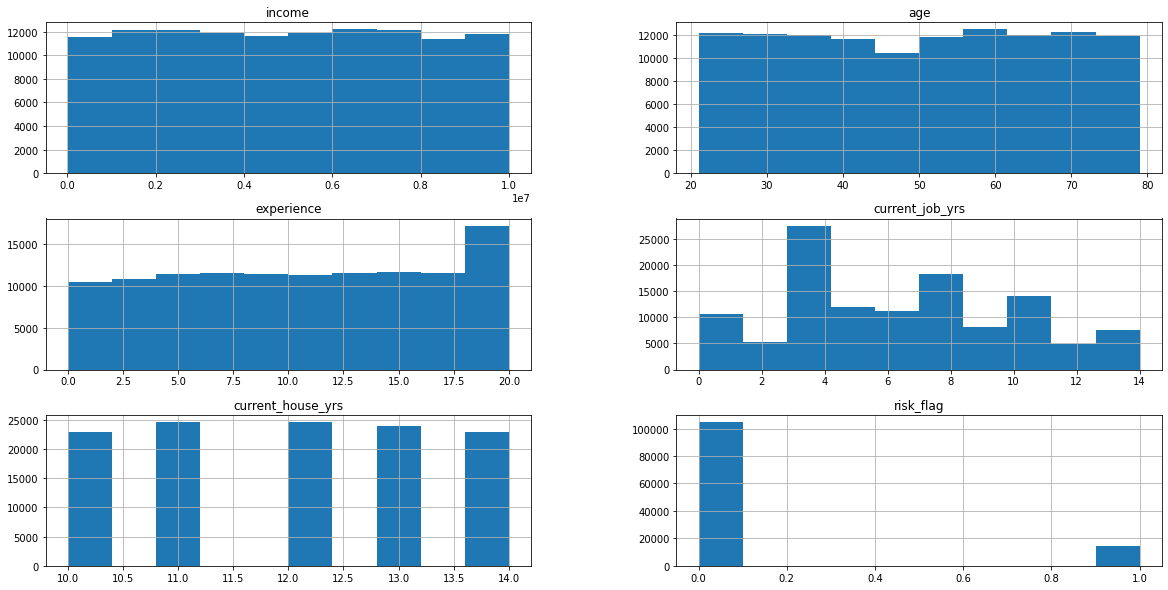

In [ ]:
# let us plot histograms to visualize patterns in the data
df_clean.hist(figsize = (20,10))

Text(0.5, 1.0, 'Checking for outliers using boxplots')

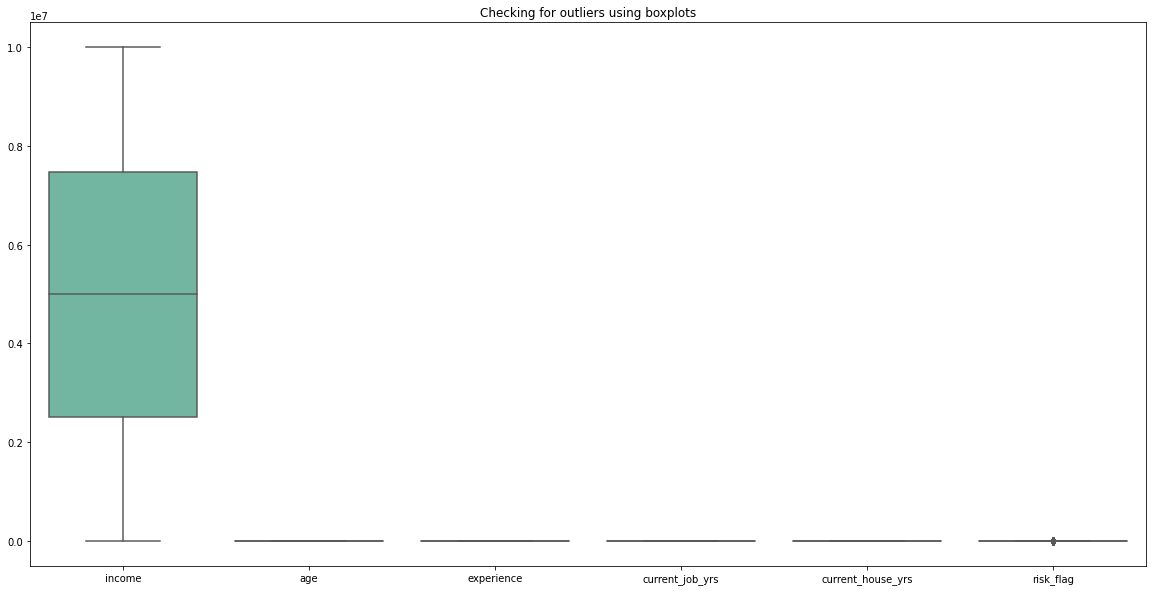

In [ ]:
# Boxplots to Visualize outliers of our numerical columns 
plt.figure(figsize = (20,10))
ax = sns.boxplot(data=df_clean, orient="v", palette="Set2")
plt.title('Checking for outliers using boxplots')
# The boxplots below indicate the outliers in each of the numerical columns

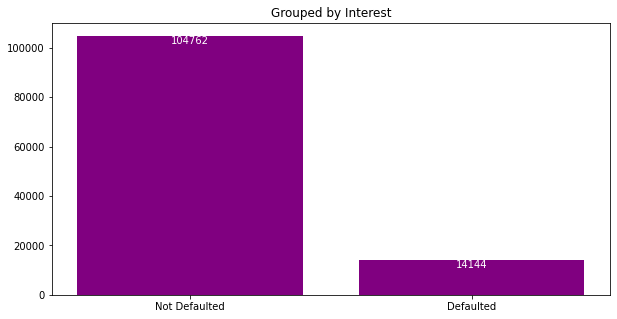

In [ ]:
# let us see how many customers are interested in a credit card
# and in the process Get info about balanced or imbalanced data set.
#Interested: 0 = No, 1 = Yes

int_count = df_clean.groupby('risk_flag')['risk_flag'].count()

plt.figure(figsize=(10,5))
plt.bar(int_count.index, int_count.values, color='purple')
plt.title('Grouped by Interest')
plt.xticks([0,1],['Not Defaulted', 'Defaulted'])
for i, value in enumerate(int_count.values):
    plt.text(i, value-70, str(value), fontsize=10, color='white',
             horizontalalignment='center', verticalalignment='top')
plt.show()

# most of the customers are not interested in credit cards 
# and our data is highly imbalanced

In [ ]:
def with_hue(data,feature,ax):
    
    #Numnber of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])
    
    bars=ax.patches
    
    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat] 
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold',fontsize=14)
    

    
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold',fontsize=14)

In [ ]:
df_clean.columns

Index(['income', 'age', 'experience', 'married/single', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_yrs',
       'current_house_yrs', 'risk_flag'],
      dtype='object')

In [ ]:
# let us see how the other columns relate to our target column
nrows=5
ncols=2
f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,34))
columns=['married/single','house_ownership', 'car_ownership']

f.patch.set_facecolor('#F2EDD7FF')

#Setting background and foreground color
for i in range(0,nrows):
  for j in range(0,ncols):
    ax[i][j].set_facecolor('#F2EDD7FF')
    ax[i][j].spines['top'].set_visible(False)
    ax[i][j].spines['right'].set_visible(False)
    ax[i][j].spines['left'].set_visible(False)
    ax[i][j].grid(linestyle="--",axis='y',color='gray')

    if (j==0):
      a1=sns.countplot(data=df_clean,x=columns[i-1],palette='rocket_r',ax=ax[i][j])
      without_hue(df_clean,columns[i-1],a1)
    elif (j==1):
      a2=sns.countplot(data=df_clean,x=columns[i-1],palette='rocket_r',ax=ax[i][j],hue="risk_flag")
      with_hue(df_clean,columns[i-1],a2)

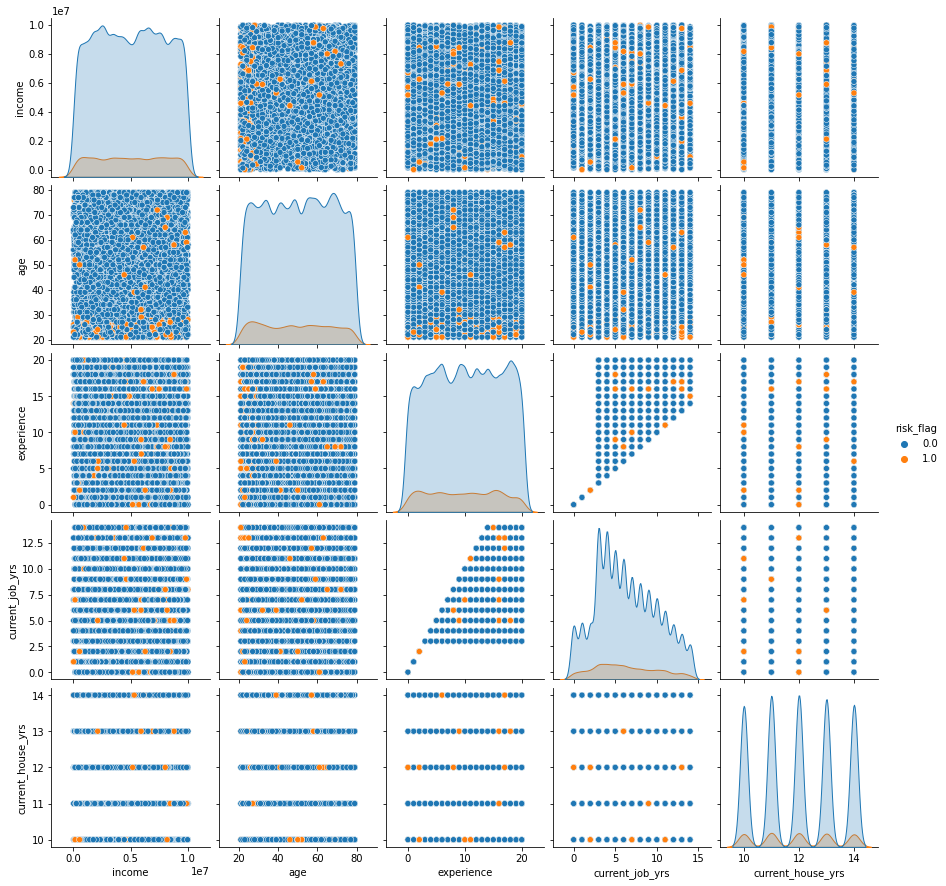

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df_clean, hue="risk_flag")
plt.show()

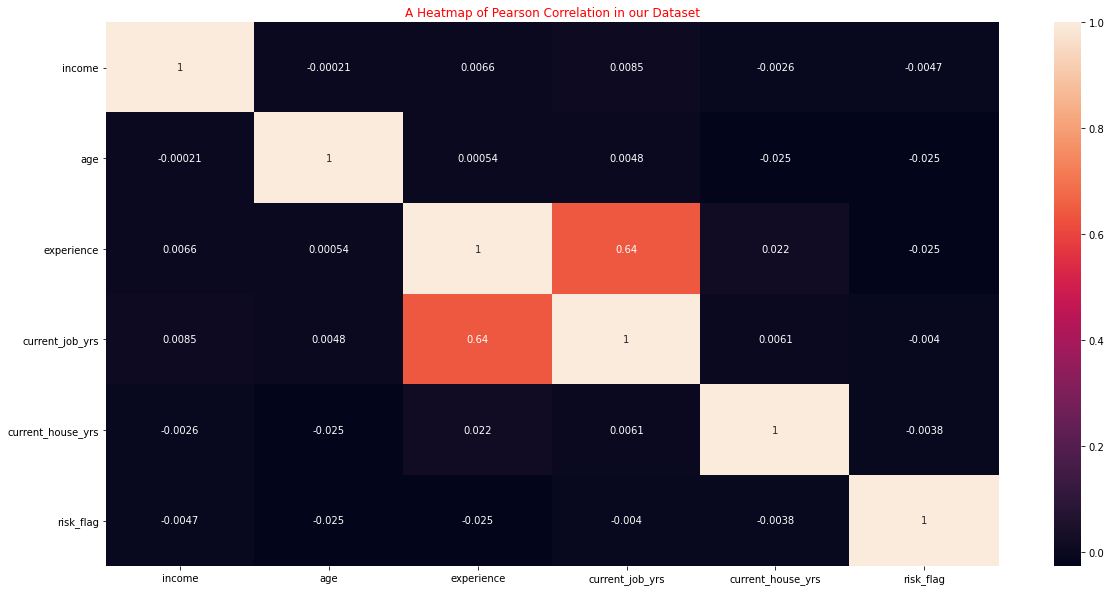

In [ ]:
# Calculating the pearson coefficient correlation
a = df_clean.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset', color='red')
plt.show()

# Feature Engineering

### extract age group from age column

In [ ]:
df_clean['age'].describe()

count    118906.000000
mean         49.967151
std          17.057606
min          21.000000
25%          35.000000
50%          50.000000
75%          65.000000
max          79.000000
Name: age, dtype: float64

In [ ]:
#we need to convert the ‘age’ feature to agegroups
data = [df_clean, test_clean]
for dataset in data:
    dataset['agegroup'] = dataset['age'].astype(int)
    dataset.loc[ dataset['agegroup'] <= 22, 'age'] = 0
    dataset.loc[(dataset['agegroup'] > 23) & (dataset['agegroup'] <= 30), 'agegroup'] = 1
    dataset.loc[(dataset['agegroup'] > 31) & (dataset['agegroup'] <= 40), 'agegroup'] = 2
    dataset.loc[(dataset['agegroup'] > 41) & (dataset['agegroup'] <= 50), 'agegroup'] = 3
    dataset.loc[(dataset['agegroup'] > 51) & (dataset['agegroup'] <= 60), 'agegroup'] = 4
    dataset.loc[(dataset['agegroup'] > 61) & (dataset['agegroup'] <= 70), 'agegroup'] = 5
    dataset.loc[(dataset['agegroup'] > 71) & (dataset['agegroup'] <= 80), 'agegroup'] = 6
    dataset.loc[ dataset['agegroup'] > 81, 'agegroup'] = 7
# let's see how it's distributed 
print(df_clean['agegroup'].value_counts())
print(test_clean['agegroup'].value_counts())

5     18527
4     18521
3     18241
2     17526
6     15652
1     14485
41     2342
22     2107
23     2026
61     2021
31     1998
21     1961
71     1946
51     1553
Name: agegroup, dtype: int64
5     4296
3     4290
4     4245
2     4182
6     3841
1     3336
41     536
22     527
61     524
23     508
21     462
71     446
31     419
51     388
Name: agegroup, dtype: int64


In [ ]:
# let us drop the age column cause we have age groups now
df_clean.drop(['age'],axis=1,inplace=True)
test_clean.drop(['age'],axis=1,inplace=True)

# Data Preprocessing

In [ ]:
#multicollinearity
#multicollinearity test
# Let's display the correlations between the variables
correlations = df_clean.corr()

correlations

income  experience  ...  risk_flag  agegroup
income             1.000000    0.006593  ...  -0.004733  0.018445
experience         0.006593    1.000000  ...  -0.024769 -0.006203
current_job_yrs    0.008504    0.641408  ...  -0.004040 -0.024896
current_house_yrs -0.002648    0.022445  ...  -0.003845 -0.014256
risk_flag         -0.004733   -0.024769  ...   1.000000 -0.000475
agegroup           0.018445   -0.006203  ...  -0.000475  1.000000

[6 rows x 6 columns]

In [ ]:
#VIF test
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

income  experience  ...  risk_flag  agegroup
income             1.000450   -0.001527  ...   0.004665 -0.018624
experience        -0.001527    1.701656  ...   0.037602 -0.017025
current_job_yrs   -0.007989   -1.091521  ...  -0.020129  0.035920
current_house_yrs  0.002484   -0.031609  ...   0.003142  0.014389
risk_flag          0.004665    0.037602  ...   1.000884  0.000167
agegroup          -0.018624   -0.017025  ...   0.000167  1.001337

[6 rows x 6 columns]

In [ ]:
df_clean.dtypes

income                 int64
experience             int64
married/single        object
house_ownership       object
car_ownership         object
profession            object
city                  object
state                 object
current_job_yrs      float64
current_house_yrs    float64
risk_flag            float64
agegroup               int64
dtype: object

In [ ]:
#it's time to transform all variables into numeric ones. 
#because machine learning models generally take numeric input
#Label Encoding
final_train = df_clean.copy(deep=True)
label_encode=LabelEncoder()
columns1=['married/single', 'house_ownership','car_ownership', 'profession','city','state']
final_train[columns1]=final_train[columns1].apply(label_encode.fit_transform)
final_train.head()

income  experience  married/single  ...  current_house_yrs  risk_flag  agegroup
0  1303834           3               1  ...               13.0        0.0        23
1  7574516          10               1  ...               13.0        0.0         2
2  3991815           4               0  ...               10.0        0.0         5
3  6256451           2               1  ...               12.0        1.0        41
4  5768871          11               1  ...               14.0        1.0         3

[5 rows x 12 columns]

In [ ]:
#Label Encoding for test data
final_test = test_clean.copy(deep=True)
label_encode=LabelEncoder()
columns1=['married/single', 'house_ownership','car_ownership', 'profession','city','state']
final_test[columns1]=final_test[columns1].apply(label_encode.fit_transform)
final_test.head()

income  experience  ...  current_house_yrs  agegroup
0  7393090          19  ...                 13         4
1  1215004           5  ...                 10         1
2  8901342          12  ...                 14         3
3  1944421           9  ...                 12         3
4    13429          18  ...                 11         1

[5 rows x 11 columns]

In [ ]:
print(final_test.shape)
print(final_train.shape)

(28000, 11)
(118906, 12)


# Modeling Time

since our data is highly imbalanced we will use resampling techniques to balance the data.

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfishing.

In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

##### Compare Algorithms without resampling

In [ ]:
# Installing catboost
!pip install catboost

In [ ]:
from matplotlib import pyplot
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# compare algorithms
# Declaring our X and y variables
X = final_train.drop('risk_flag', axis=1)
y = final_train.risk_flag

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.557025 (0.005157)
LDA: 0.557055 (0.005147)
KNN: 0.953472 (0.003802)
DTC: 0.963054 (0.002134)
RF: 0.963066 (0.002144)
GBC: 0.694806 (0.010220)
NB: 0.560049 (0.006917)


##### Compare Algorithms - Oversampling

In [ ]:
# compare algorithms
# Declaring our X and y variables
X = final_train.drop('risk_flag', axis=1)
y = final_train.risk_flag

# oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# #scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.505250 (0.004812)
LDA: 0.561427 (0.003869)
KNN: 0.960177 (0.001797)
DTC: 0.966322 (0.000838)
RF: 0.966345 (0.000858)
GBC: 0.721942 (0.004202)
NB: 0.510785 (0.006240)


##### Compare Algorithms - Undersampling

In [ ]:
# compare algorithms
# Declaring our X and y variables
X = final_train.drop('risk_flag', axis=1)
y = final_train.risk_flag

# undersampling
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.503991 (0.014270)
LDA: 0.561409 (0.012407)
KNN: 0.922618 (0.007138)
CART: 0.942152 (0.005812)
RF: 0.961144 (0.005185)
GBC: 0.706922 (0.008193)
NB: 0.507074 (0.010182)


In [ ]:
# oversampling works best 

### Random Forest

In [ ]:
# Declaring our X and y variables
X = final_train.drop('risk_flag', axis=1)
y = final_train.risk_flag

# oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

rfc = RandomForestClassifier(random_state=101)
# Train a model

rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)



# printing the accuracy using accuracy score
print(roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = rfc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The area under curve score for our train dataset is: {roc_auc_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

0.9554091228968076
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95     31262
         1.0       0.92      1.00      0.96     31596

    accuracy                           0.96     62858
   macro avg       0.96      0.96      0.96     62858
weighted avg       0.96      0.96      0.96     62858



The area under curve score for our train dataset is: 0.9559591836734693
The f1 score for our train dataset is 0.9576325536955356
[[67026  6474]
 [    0 73166]]
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95     73500
         1.0       0.92      1.00      0.96     73166

    accuracy                           0.96    146666
   macro avg       0.96      0.96      0.96    146666
weighted avg       0.96      0.96      0.96    146666



In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# Declaring our X and y variables
X = final_train.drop('risk_flag', axis=1)
y = final_train.risk_flag

# oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

rfc = RandomForestClassifier(random_state=101)
# Train a model

rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rfc, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Auc: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Auc: 0.967 (0.001)


# Testing

In [ ]:
# from the tests above, random forest has performed the best 
# with an AUC_ROC score of 96.7%

In [ ]:
### predict on the test data
test_predictions = rfc.predict(final_test)
submission_df = pd.DataFrame()
submission_df["ID"] = df_test["ID"]
submission_df["Is_Lead"] = test_predictions
# file
submission_df.to_csv("loan_pred_random.csv", index=False)